In [53]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

df = pd.read_csv(url, header = None)
df.head()
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


symboling              int64
normalized-losses     object
make                   int64
fuel-type              int64
aspiration             int64
num-of-doors           int64
body-style             int64
drive-wheels           int64
engine-location        int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int64
num-of-cylinders       int64
engine-size            int64
fuel-system            int64
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


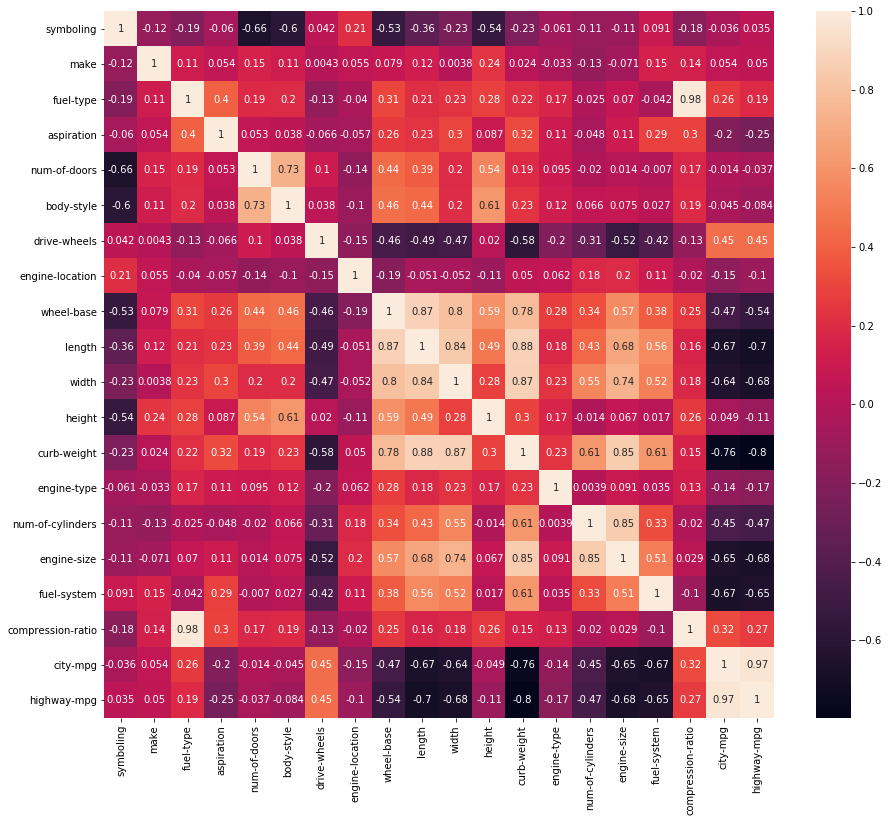

In [55]:
##Defining headers for the DataSet
headers=["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels",
        "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders",
         "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
         "highway-mpg", "price"]


df.columns = headers
df=df.replace('alfa-romero',1)
df=df.replace('audi',2)
df=df.replace('bmw',3)
df=df.replace('chevrolet',4)
df=df.replace('dodge',5)
df=df.replace('honda',6)
df=df.replace('isuzu',7)
df=df.replace('jaguar',8)
df=df.replace('mazda',9)
df=df.replace('mercedes-benz',10)
df=df.replace('mercury',11)
df=df.replace('mitsubishi',12)
df=df.replace('nissan',13)
df=df.replace('peugot',14)
df=df.replace('plymouth',15)
df=df.replace('porsche',16)
df=df.replace('renault',17)
df=df.replace('saab',18)
df=df.replace('subaru',19)
df=df.replace('toyota',20)
df=df.replace('volkswagen',21)
df=df.replace('volvo',22)

df["aspiration"].replace('std', 0, inplace = True)
df["aspiration"].replace('turbo', 1, inplace = True)


df["num-of-doors"].replace('two', 0, inplace = True)
df["num-of-doors"].replace('four', 1, inplace = True)
df["num-of-doors"].replace('?', 1, inplace = True)


df["body-style"].replace('convertible', 0, inplace = True)
df["body-style"].replace('hatchback', 1, inplace = True)
df["body-style"].replace('hardtop', 2, inplace = True)
df["body-style"].replace('sedan', 3, inplace = True)
df["body-style"].replace('wagon', 4, inplace = True)



df["drive-wheels"].replace('rwd', 0, inplace = True)
df["drive-wheels"].replace('fwd', 1, inplace = True)
df["drive-wheels"].replace('4wd', 2, inplace = True)



df["engine-type"].replace('dohc', 0, inplace = True)
df["engine-type"].replace('dohcv', 1, inplace = True)
df["engine-type"].replace('ohc', 2, inplace = True)
df["engine-type"].replace('ohcf', 3, inplace = True)
df["engine-type"].replace('ohcv', 4, inplace = True)
df["engine-type"].replace('rotor', 5, inplace = True)
df["engine-type"].replace('l', 6, inplace = True)


df["num-of-cylinders"].replace('two', 2, inplace = True)
df["num-of-cylinders"].replace('three', 3, inplace = True)
df["num-of-cylinders"].replace('four', 4, inplace = True)
df["num-of-cylinders"].replace('five', 5, inplace = True)
df["num-of-cylinders"].replace('six', 6, inplace = True)
df["num-of-cylinders"].replace('eight', 8, inplace = True)
df["num-of-cylinders"].replace('twelve', 12, inplace = True)

df["fuel-system"].replace('1bbl', 0, inplace = True)
df["fuel-system"].replace('2bbl', 1, inplace = True)
df["fuel-system"].replace('4bbl', 2, inplace = True)
df["fuel-system"].replace('idi', 3, inplace = True)
df["fuel-system"].replace('mfi', 4, inplace = True)
df["fuel-system"].replace('mpfi', 5, inplace = True)
df["fuel-system"].replace('spdi', 6, inplace = True)
df["fuel-system"].replace('spfi', 7, inplace = True)

df["horsepower"].replace('?',120,inplace=True)
df["peak-rpm"].replace('?',5000,inplace=True)
df["price"].replace('?',20000,inplace=True)
df["bore"].replace('?',3.00,inplace=True)
df["stroke"].replace('?',3.00,inplace=True)
df["fuel-system"].replace('spfi', 7, inplace = True)
df["normalized-losses"].replace('?',160,inplace=True)

df["fuel-type"].replace('gas',1,inplace=True)
df["fuel-type"].replace('diesel',2,inplace=True)


df["engine-location"].replace('front',1,inplace=True)
df["engine-location"].replace('rear',2,inplace=True)


print(df.dtypes)
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [56]:
df["price"].replace('?',np.nan, inplace = True)
df.dropna(subset=["price"], axis=0, inplace=True)
df["price"] = df["price"].astype("int")

##Data Formatting, converting peak-rpm from Object to Int, dropping NaN values

df["peak-rpm"].replace('?',np.nan, inplace = True)
df.dropna(subset=["peak-rpm"], axis=0, inplace=True)
df["peak-rpm"] = df["peak-rpm"].astype("int")

df["normalized-losses"].replace('?',np.nan, inplace = True)
df.dropna(subset=["normalized-losses"], axis=0, inplace=True)
df["normalized-losses"] = df["normalized-losses"].astype("int")

df["bore"].replace('?',np.nan, inplace = True)
df.dropna(subset=["bore"], axis=0, inplace=True)
df["bore"] = df["bore"].astype("float")

df["stroke"].replace('?',np.nan, inplace = True)
df.dropna(subset=["stroke"], axis=0, inplace=True)
df["stroke"] = df["stroke"].astype("float")

df["horsepower"].replace('?',np.nan, inplace = True)
df.dropna(subset=["horsepower"], axis=0, inplace=True)
df["horsepower"] = df["horsepower"].astype("int")

print(df.dtypes)

symboling              int64
normalized-losses      int64
make                   int64
fuel-type              int64
aspiration             int64
num-of-doors           int64
body-style             int64
drive-wheels           int64
engine-location        int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int64
num-of-cylinders       int64
engine-size            int64
fuel-system            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


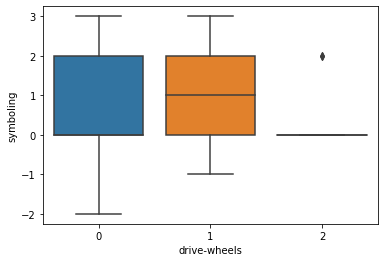

In [57]:
sns.boxplot(x="drive-wheels", y="symboling", data=df)
plt.show()

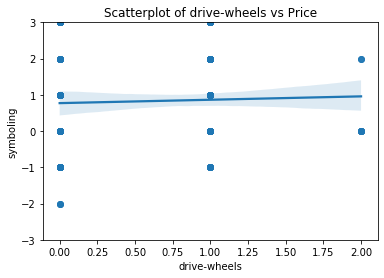

In [58]:
sns.regplot(x='drive-wheels', y='symboling', data=df)
plt.title("Scatterplot of drive-wheels vs Price")
plt.xlabel("drive-wheels")
plt.ylabel("symboling")
plt.ylim(-3,3)
plt.show()

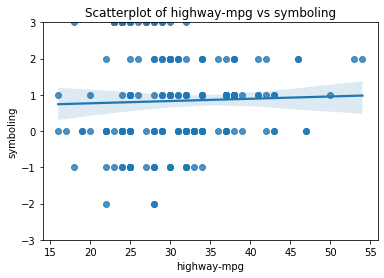

In [59]:
sns.regplot(x='highway-mpg', y='symboling', data=df)
plt.title("Scatterplot of highway-mpg vs symboling")
plt.xlabel("highway-mpg")
plt.ylabel("symboling")
plt.ylim(-3,3)
plt.show()

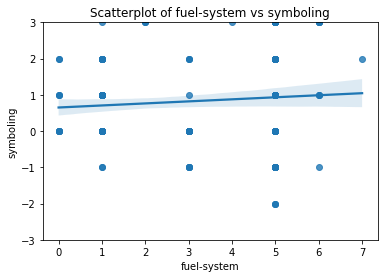

In [60]:
sns.regplot(x='fuel-system', y='symboling', data=df)
plt.title("Scatterplot of fuel-system vs symboling")
plt.xlabel("fuel-system")
plt.ylabel("symboling")
plt.ylim(-3,3)
plt.show()

In [62]:
x_train, y_train, x_test, y_test = xtr.values, ytr.values, xte.values, yte.values

In [22]:
print(y_train)

[ 85 115 150 128 125  98  91 103 113  94 104  83 102 161 122 161  89 160
 197 160 148 161  94 160 160 160  95  91 115 160 129  74 160 160 192 160
 160 103 122  87 168 164 103 119  91  74 104 160 128 161 128 115 102  85
  93 160 160 125  95 188  77 118 256 104  81 160 161 106 168  95 158  93
 160 154  91  94  91 128  65 192 119 108 110 150 118 160 154 168 107 194
 150  65 160 106 104 113  91 160 101 110 160  87 137 134 160  90 101 134
 102  95  89 145 106 160  65 161 161  85  74 142 161 148 168 153  95  65
 103  85 150  83 137  93 125  78 118 160 108  74  93 160 161 145 134]


In [17]:
print(x_train.shape)

(143, 24)


In [23]:
import os
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
EPOCHS = 1
BATCH_SIZE = 50
LR = 0.001

In [25]:
x_train, y_train, x_test, y_test = torch.from_numpy(x_train), torch.from_numpy(y_train), torch.from_numpy(x_test), torch.from_numpy(y_test)

In [26]:
x_train.size()

torch.Size([143, 24])

In [ ]:
class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, 5, 1, 2),#in_channel=input height, out_channel=n_filters=n_feature map, kernal_size, stride=1, padding
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.out = nn.Linear(32 * 7 * 7, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = self.out(x)
        return x

In [63]:
Z = df[["symboling", "make", "aspiration", "num-of-doors", "body-style", "drive-wheels",
         "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders",
         "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
         "highway-mpg", "price"]]
Y=df["symboling"]
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bagging.fit(Z,Y)
print(bagging.score(Z,Y))

0.6341463414634146


In [68]:
gbc = GradientBoostingClassifier(
                                   max_depth=40,
                                   min_samples_split=8,
                                   min_samples_leaf=3,
                                   n_estimators=1200,
                                   learning_rate=0.05,
                                   subsample=0.95)

In [69]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=40,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=8,
                           min_weight_fraction_leaf=0.0, n_estimators=1200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.95, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [71]:
precition = gbc.score(x_test, y_test)
print('precition is : ', precition * 100, "%")

precition is :  59.67741935483871 %


In [ ]:
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


def readData(filename) -> (np.array, np.array):
    '''
    Read data from pattern-learn or pattern-test
    '''
    one_hots = []
    features = []
    with open(filename) as f:
        lines = f.readlines()
        for idx, line in enumerate(lines):
            eles = line.strip().split()
            features.append(list(map(float, eles[:96])))
            one_hots.append(list(map(int, eles[96:])))
            #print(idx, features, one_hots)
    labels = [np.argmax(oh) for oh in one_hots]
    return np.array(features), np.array(labels)


x_train, y_train = readData("../learn/pattern-test")
x_test, y_test = readData("../data/pattern-learn")

# for i in range(np.shape(x_train)[0]):
#     if y_train[i] == 1:
#         plt.scatter(x_train[i][0], x_train[i][1], c='b', s=20)
#     else:
#         plt.scatter(x_train[i][0], x_train[i][1], c='y', s=20)
# #plt.show()

train_num = 5000
test_num = 1000

model = GradientBoostingClassifier(max_features=90,
                                   max_depth=40,
                                   min_samples_split=8,
                                   min_samples_leaf=3,
                                   n_estimators=1200,
                                   learning_rate=0.05,
                                   subsample=0.95)
scores_clf_svc_cv = cross_val_score(model, x_train, y_train, cv=5)
print(scores_clf_svc_cv)
print("Accuracy: %0.2f (+/- %0.2f)" %
      (scores_clf_svc_cv.mean(), scores_clf_svc_cv.std() * 2))

model.fit(x_train, y_train)

precition = model.score(x_test, y_test)
print('precition is : ', precition * 100, "%")